9.1.2

In [1]:
import statsmodels.api as sm
import pandas as pd

housing_prices = pd.read_csv("../datasets/housing_prices.csv")

X = housing_prices[["sq_footage", "n_bedrooms"]]
y = housing_prices["price"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     3285.
Date:                Sun, 25 May 2025   Prob (F-statistic):               0.00
Time:                        17:34:51   Log-Likelihood:                -15993.
No. Observations:                1298   AIC:                         3.199e+04
Df Residuals:                    1295   BIC:                         3.201e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.044e+05   4966.113     21.030      0.0

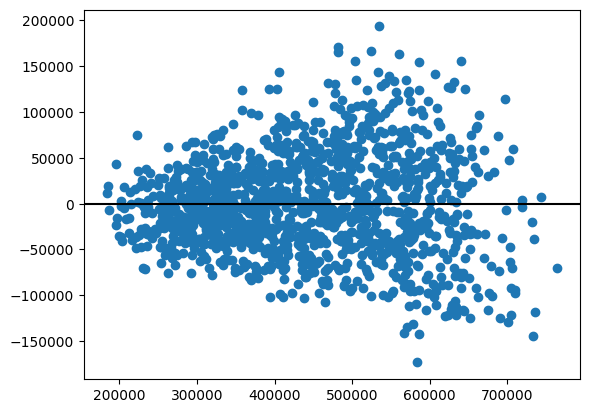

In [2]:
import matplotlib.pyplot as plt 

housing_prices["residuals"] = model.resid
housing_prices["predicted_values"] = model.predict()

plt.scatter(
    housing_prices["predicted_values"],
    housing_prices["residuals"]
)
plt.axhline(y=0, color= "black", linestyle="-");

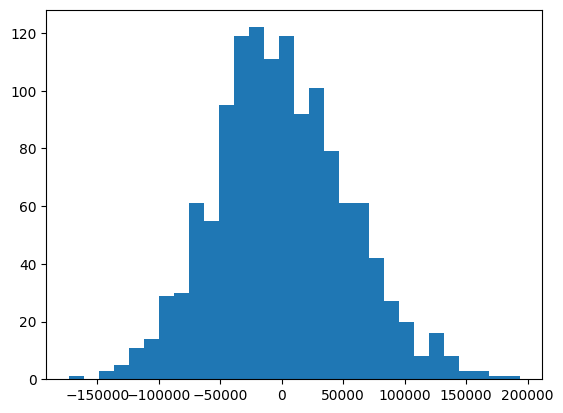

In [3]:
plt.hist(housing_prices["residuals"], bins=30);

9.2

In [4]:
rats = pd.read_csv("../datasets/rat_sightings.csv")
weather = pd.read_csv("../datasets/weather.csv")

rats_weather = pd.merge(
    weather,
    rats,
    on = "day",
    how = "left"
).fillna(0)

rats_weather["day"] = pd.to_datetime(
    rats_weather["day"],
    format='%m/%d/%y'
)

rats_weather.corr().round(2)

,day,high_temp,low_temp,humidity,wind_speed,precip,rat_sightings
day,1.00,0.11,0.13,-0.09,-0.01,-0.06,-0.04
high_temp,0.11,1.00,0.96,0.17,-0.22,-0.04,0.60
low_temp,0.13,0.96,1.00,0.19,-0.25,-0.03,0.61
humidity,-0.09,0.17,0.19,1.00,0.04,0.23,0.15
wind_speed,-0.01,-0.22,-0.25,0.04,1.00,0.21,-0.24
precip,-0.06,-0.04,-0.03,0.23,0.21,1.00,-0.03
rat_sightings,-0.04,0.60,0.61,0.15,-0.24,-0.03,1.00


In [5]:

rats_weather["dow"] = rats_weather["day"].dt.dayofweek
rats_weather["month_num"] = rats_weather["day"].dt.month
rats_weather.head()  

,day,high_temp,low_temp,humidity,wind_speed,precip,rat_sightings,dow,month_num
0,2018-01-01,19.0,8.0,67.0,22.0,0.00,15,0,1
1,2018-01-02,26.0,14.0,59.0,21.0,0.00,36,1,1
2,2018-01-03,30.0,18.0,53.0,16.0,0.00,36,2,1
3,2018-01-04,29.0,20.0,92.0,37.0,0.02,14,3,1
4,2018-01-05,19.0,11.0,56.0,31.0,6.54,18,4,1


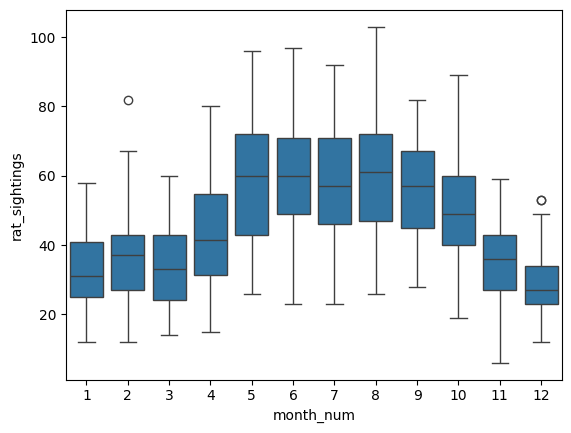

In [6]:
import seaborn as sns
sns.boxplot(data=rats_weather, x="month_num", y="rat_sightings");

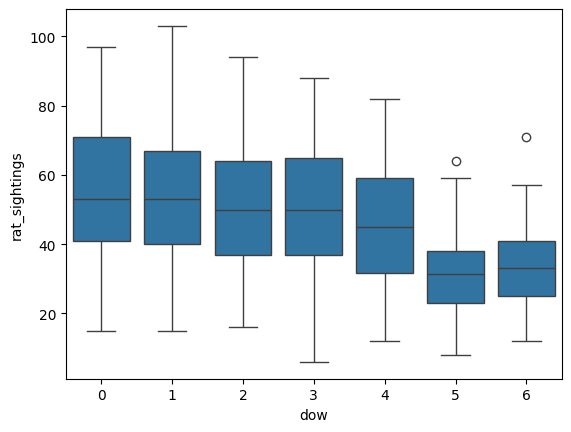

In [7]:
sns.boxplot(data=rats_weather, x="dow", y="rat_sightings"); 

In [8]:
rats_weather["weekday"] = (rats_weather["dow"]<5).astype(int)
rats_weather[
    ["high_temp", "wind_speed", "weekday", "rat_sightings"]
].corr().round(2)

,high_temp,wind_speed,weekday,rat_sightings
high_temp,1.00,-0.22,0.01,0.60
wind_speed,-0.22,1.00,0.02,-0.24
weekday,0.01,0.02,1.00,0.47
rat_sightings,0.60,-0.24,0.47,1.00
